In [4]:
import json

import pandas as pd
import tensorflow as tf
import numpy as np

from model.dataset import *
from model.model import *

%load_ext autoreload
%autoreload 2

with open('config.json') as raw_config:
    config = json.load(raw_config)
    
train_source = build_source_from_metadata(pd.read_csv(config['model']['metadata_path']),
                                        config['model']['data_path'], 'train')
train_source[:5]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[('data/train/9806e05a7b0a4aa396d696f922a4c0af.jpg', 1),
 ('data/train/9ea4851198a148cbb98e9770135c0dff.jpg', 1),
 ('data/train/dc30447f35c742499807679d0c50d8ef.jpg', 4),
 ('data/train/c50eff5a3aa64139a9a940921b251f04.jpg', 1),
 ('data/train/a7f28bae35a64fe09928831acce29bd6.jpg', 2)]

In [5]:
linear_model = LinearModel(config, overfit_mode=False)
print(linear_model)

LinearModel

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 15365     
Total params: 15,365
Trainable params: 15,365
Non-trainable params: 0
_________________________________________________________________


In [7]:
test = linear_model.train()

W0707 00:43:37.963711 140345248917312 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/50
161/161 [==============================] - 2s 15ms/step - loss: 0.8323 - accuracy: 0.6918 - val_loss: 0.9284 - val_accuracy: 0.6867
Epoch 2/50
161/161 [==============================] - 2s 10ms/step - loss: 0.8182 - accuracy: 0.6938 - val_loss: 0.9268 - val_accuracy: 0.6831
Epoch 3/50
161/161 [==============================] - 2s 10ms/step - loss: 0.8093 - accuracy: 0.6946 - val_loss: 0.9250 - val_accuracy: 0.6849
Epoch 4/50
161/161 [==============================] - 2s 10ms/step - loss: 0.8010 - accuracy: 0.6965 - val_loss: 0.9234 - val_accuracy: 0.6885
Epoch 5/50
161/161 [==============================] - 2s 10ms/step - loss: 0.7932 - accuracy: 0.7008 - val_loss: 0.9221 - val_accuracy: 0.6903
Epoch 6/50
161/161 [==============================] - 2s 10ms/step - loss: 0.7859 - accuracy: 0.7019 - val_loss: 0.9209 - val_accuracy: 0.6903
Epoch 7/50
161/161 [==============================] - 2s 10ms/step - loss: 0.7789 - accuracy: 0.7051 - val_loss: 0.9199 - val_accuracy: 0.6903

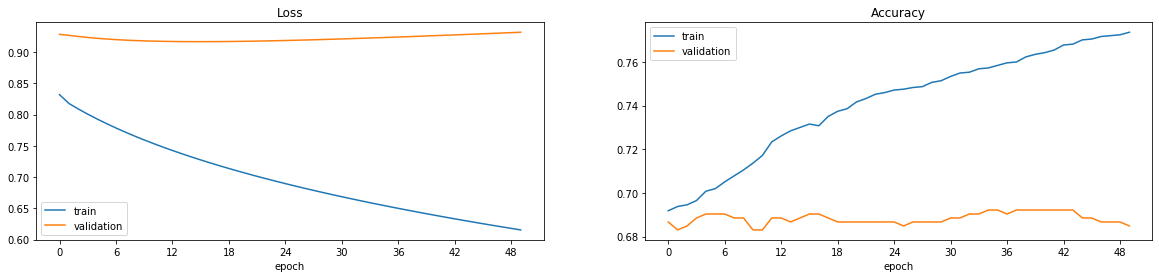

In [8]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(test.history['loss'], label='train')
ax1.plot(test.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(test.history['accuracy'], label='train')
ax2.plot(test.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

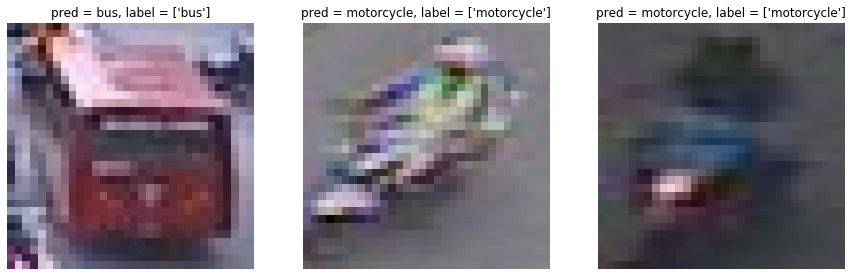

In [9]:
imshow_with_predictions(linear_model, next(iter(linear_model.test_data)), show_label=True, label_map=linear_model.config['model']['labels'])

In [12]:
linear_model.evaluate()

train
161/161 [==============================] - 1s 8ms/step - loss: 0.6067 - accuracy: 0.7844
test
34/34 [==============================] - 0s 9ms/step - loss: 0.9669 - accuracy: 0.6314


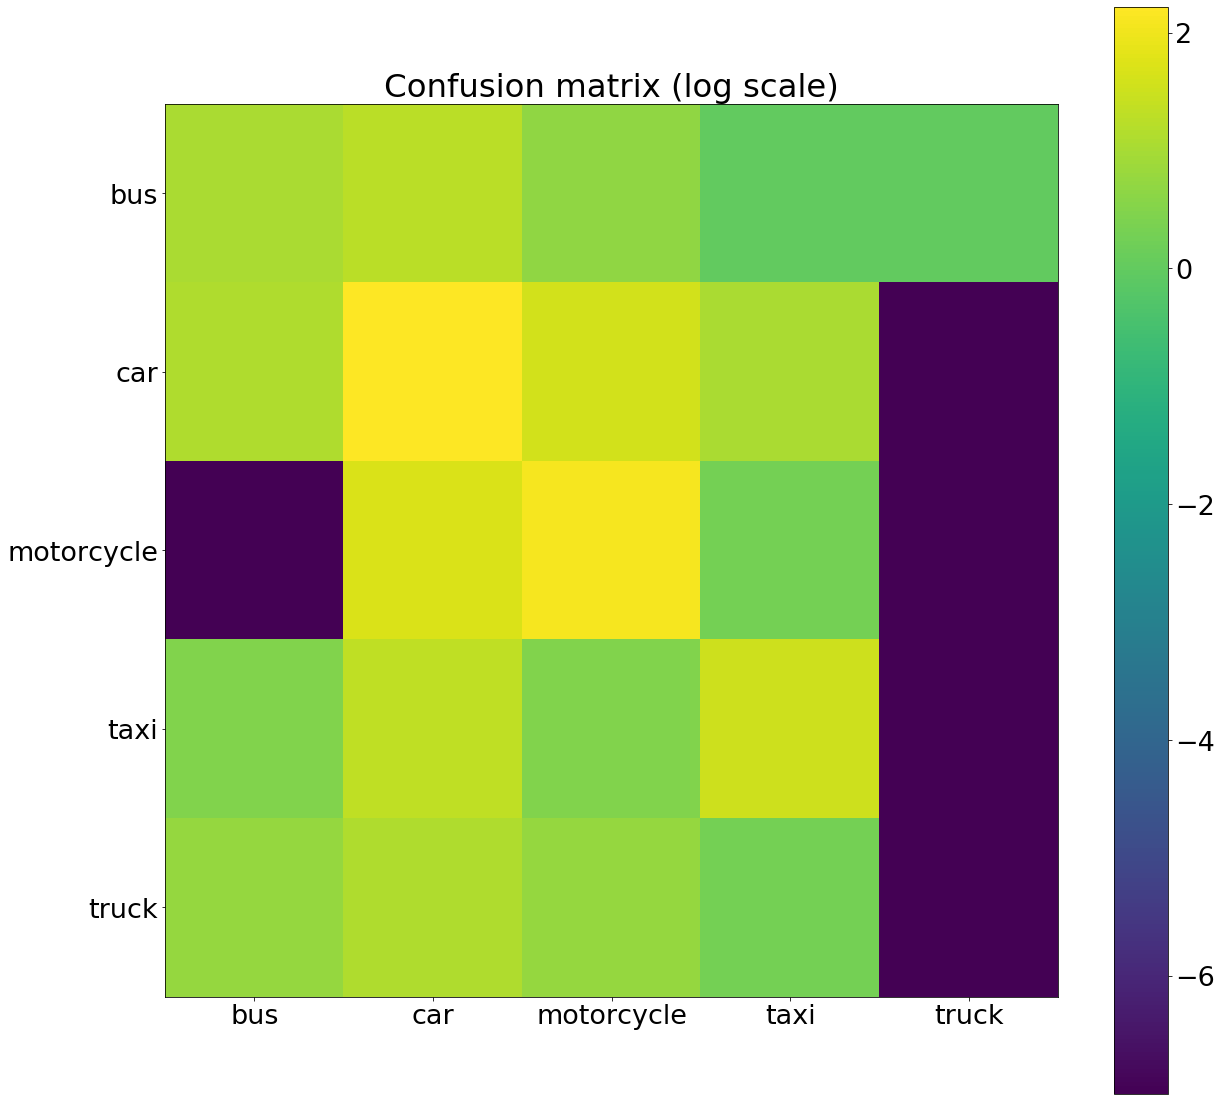

In [11]:
plt.figure(figsize=(20, 20))
plt.imshow(np.log10(compute_confusion_matrix(linear_model).numpy() + 0.0000001))
plt.yticks(np.arange(5), labels=linear_model.config['model']['labels'])
plt.xticks(np.arange(5), labels=linear_model.config['model']['labels'])
plt.title('Confusion matrix (log scale)')
plt.colorbar()
plt.rcParams.update({'font.size': 27})